In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [17]:
a = pd.read_excel('agriculture_percent_of_gdp.xlsx')
s = pd.read_excel('services_percent_of_gdp.xlsx')
i = pd.read_excel('industry_percent_of_gdp.xlsx')
IDH = pd.read_excel('hdi_human_development_index.xlsx')

agr = a.loc[:, ["geo", 2010]].set_index('geo').rename(index=str,columns={2010:"Agricultura (%)"})
ind = i.loc[:, ["geo", 2010]].set_index('geo').rename(index=str,columns={2010:"Servicos (%)"})
ser = s.loc[:, ["geo", 2010]].set_index('geo').rename(index=str,columns={2010:"Industria (%)"})

pib_comp = agr.join(ind).join(ser)

data = pib_comp.join(IDH.loc[:, ["geo", 2010]].set_index('geo').rename(index=str,columns={2010:"IDH"})).dropna()

In [3]:
def retasub(dados_x1, dados_y1,xlab1,ylab1,tit1,dados_x2, dados_y2,xlab2,ylab2,tit2,dados_x3, dados_y3,xlab3,ylab3,tit3):    
    fig = plt.figure(figsize=(15, 5))
    
    a1 = dados_y1.cov(dados_x1) / dados_x1.var()
    b1 = dados_y1.mean() - a1*dados_x1.mean()

    plt.subplot(131)
    sns.regplot(dados_x1, dados_y1)
    plt.title(tit1)
    plt.xlabel(xlab1)
    plt.ylabel(ylab1)
    plt.ylim(0,)
    plt.plot((dados_x1.min(), dados_x1.max()), (a1*dados_x1.min()+b1, a1*dados_x1.max()+b1), color='blue')
    
    a2 = dados_y2.cov(dados_x2) / dados_x2.var()
    b2 = dados_y2.mean() - a2*dados_x2.mean()
    
    plt.subplot(132)
    sns.regplot(dados_x2, dados_y2)
    plt.title(tit2)
    plt.xlabel(xlab2)
    plt.ylabel(ylab2)
    plt.plot((dados_x2.min(), dados_x2.max()), (a2*dados_x2.min()+b2, a2*dados_x2.max()+b2), color='blue')

    a3 = dados_y3.cov(dados_x3) / dados_x3.var()
    b3 = dados_y3.mean() - a3*dados_x3.mean()
    
    plt.subplot(133)
    sns.regplot(dados_x3, dados_y3)
    plt.title(tit3)
    plt.xlabel(xlab3)
    plt.ylabel(ylab3)
    plt.plot((dados_x3.min(), dados_x3.max()), (a3*dados_x3.min()+b3, a3*dados_x3.max()+b3), color='blue')
    
    plt.tight_layout()
    plt.show()

def plotpais(country):
    
    idh = IDH[IDH.geo==country].rename(index=str,columns={'geo':country}).set_index(country).T.rename(index=str,columns={country:'IDH'})

    AGR = a[a.geo==country].rename(index=str,columns={'geo':country}).set_index(country).T.rename(index=str,columns={country:'Agro'})
    SER = s[s.geo==country].rename(index=str,columns={'geo':country}).set_index(country).T.rename(index=str,columns={country:'Serv'})
    IND = i[i.geo==country].rename(index=str,columns={'geo':country}).set_index(country).T.rename(index=str,columns={country:'Ind'})
    
    coun = idh.join(AGR).join(SER).join(IND)
    
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(111)
    ax.plot(coun.index,coun.Agro, 'g-', label = 'Agricultura')
    ax.plot(coun.index,coun.Serv, '-', label = 'Serviços')
    ax.plot(coun.index,coun.Ind, '-y', label = 'Indústria')
    ax2 = ax.twinx()
    ax2.plot(coun.index,coun.IDH, '--r', label = 'IDH')
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")
    ax.grid()
    ax.set_xlabel("Ano")
    ax.set_ylabel("Porcentagem do PIB (%)")
    ax2.set_ylabel("IDH")
    ax2.set_ylim(0, 1)
    ax.set_ylim(0,100)
    ax.set_xlim(0,2015)
    plt.title(country)
    plt.show()
    
def plotcompa(country1,country2):
    
    idh1 = IDH[IDH.geo==country1].rename(index=str,columns={'geo':country1}).set_index(country1).T.rename(index=str,columns={country1:'IDH'})
    AGR1 = a[a.geo==country1].rename(index=str,columns={'geo':country1}).set_index(country1).T.rename(index=str,columns={country1:'Agro'})
    SER1 = s[s.geo==country1].rename(index=str,columns={'geo':country1}).set_index(country1).T.rename(index=str,columns={country1:'Serv'})
    IND1 = i[i.geo==country1].rename(index=str,columns={'geo':country1}).set_index(country1).T.rename(index=str,columns={country1:'Ind'})   
    coun1 = idh1.join(AGR1).join(SER1).join(IND1)
    
    idh2 = IDH[IDH.geo==country2].rename(index=str,columns={'geo':country2}).set_index(country2).T.rename(index=str,columns={country2:'IDH'})
    AGR2 = a[a.geo==country2].rename(index=str,columns={'geo':country2}).set_index(country2).T.rename(index=str,columns={country2:'Agro'})
    SER2 = s[s.geo==country2].rename(index=str,columns={'geo':country2}).set_index(country2).T.rename(index=str,columns={country2:'Serv'})
    IND2 = i[i.geo==country2].rename(index=str,columns={'geo':country2}).set_index(country2).T.rename(index=str,columns={country2:'Ind'})
    coun2 = idh2.join(AGR2).join(SER2).join(IND2)
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax.plot(coun1.index,coun1.Agro, 'g-s', label = 'Agricultura ({})'.format(country1))
    ax.plot(coun1.index,coun1.Serv, 's-b', label = 'Serviços ({})'.format(country1))
    ax.plot(coun1.index,coun1.Ind, 's-y', label = 'Indústria ({})'.format(country1))
    ax.plot(coun2.index,coun2.Agro, 'g-^', label = 'Agricultura ({})'.format(country2))
    ax.plot(coun2.index,coun2.Serv, '^-b', label = 'Serviços ({})'.format(country2))
    ax.plot(coun2.index,coun2.Ind, '^-y', label = 'Indústria ({})'.format(country2))
    ax2 = ax.twinx()
    ax2.plot(coun1.index,coun1.IDH, '--r', label = '{} (IDH)'.format(country1))
    ax2.plot(coun2.index,coun2.IDH, '-.r', label = '{} (IDH)'.format(country2))
    ax.legend(bbox_to_anchor=(1.05, 1))
    ax2.legend(bbox_to_anchor=(1.2, 0.7))
    ax.grid()
    ax.set_xlabel("Ano")
    ax.set_ylabel("Porcentagem do PIB (%)")
    ax2.set_ylabel("IDH")
    ax2.set_ylim(0, 1)
    ax.set_ylim(0,100)
    ax.set_xlim(0,2015)
    plt.title("{0} X {1}".format(country1,country2))
    plt.show()

# Projeto 1 - Ciência dos dados

Como primeiro projeto de ciência dos dados, foi requisitado uma comparação entre o indicador de IDH dos países com outros indicadores fornecidos pelo Gapminder. Com as diferentes economias de diferentes países em mente, foram tomados como indicadores as porcentagens de composição do PIB de cada país, a fim de responder a seguinte pergunta:

__Os PIBs dos países com IDHs mais altos possuem uma relação agricultura X serviços X indústria destoante daqueles com IDHs mais baixos?__

Para responder a essa indagação, foi plotado um gráfico com as porcentagens de cada componente do PIB juntas, de modo a formar 100% do PIB. Os países foram ordenadas por IDH (do maior para o menor), com o objetivo de melhorarar a visualização, bem como pode ser observado abaixo:

Gráfico 1.1


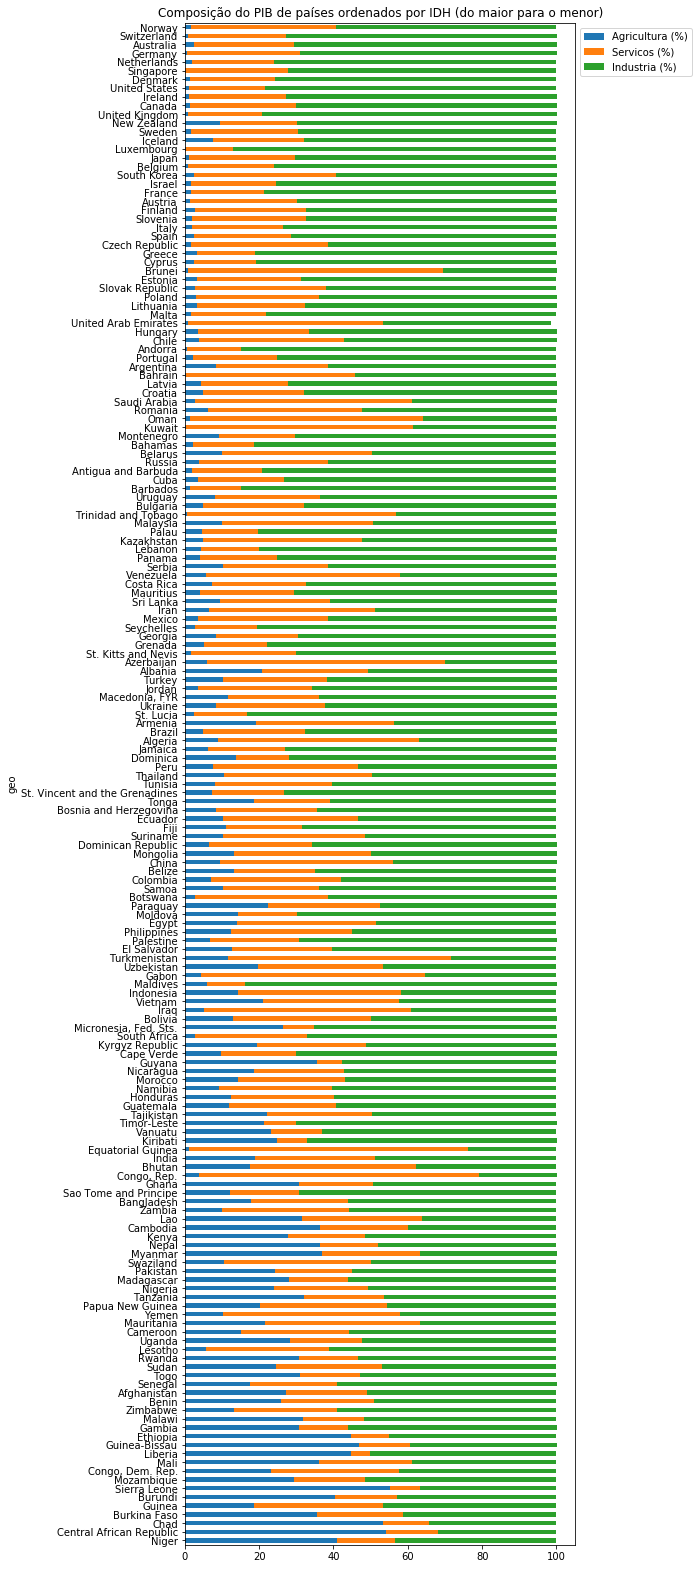

In [11]:
data_plot = data.sort_values(by="IDH").iloc[::,0:3] # Mudar o iloc para mudar a quantidade de países no gráfico
graf1 = data_plot.plot(kind='barh', stacked=True, figsize=(7,28))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Composição do PIB de países ordenados por IDH (do maior para o menor)")
print("Gráfico 1.1")

Nesse primeiro gráfico, alguns padrôes interessantes são perceptíveis. O mais óbvio deles é a agricultura, que vai de menos de 1% da composição em países com IDH mais alto, para mais de 50% em alguns exemplos da base do gráfico. Um pouco menos visível, mas ainda perceptível, é a diminuição da porcentagem de indústria junto com a diminuição do PIB. E por fim, quase não perceptível, está a composiçao de serviços.

Importante ressaltar, entretanto, que apesar dos padrões, existem diversas exceções. Esse comportamento era previsível devido às múltiplas individualidades de cada país, tais como área agricultável, localização, questões históricas e etc.

Para fazer uma análise mais detalhada, plotou-se as composições individualmente comparadas para se analisar melhor a dispersão e a correlação de cada componente como pode ser visto abaixo:

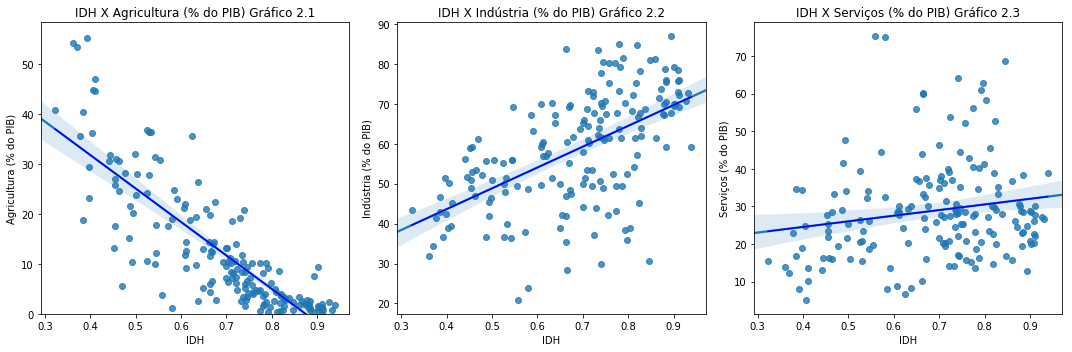

Correlação:


,Agricultura (%),Servicos (%),Industria (%)
IDH,-0.830223,0.176019,0.569733


In [12]:
retasub(data["IDH"],data["Agricultura (%)"],"IDH","Agricultura (% do PIB)","IDH X Agricultura (% do PIB) Gráfico 2.1",
       data["IDH"],data["Industria (%)"],"IDH","Indústria (% do PIB)","IDH X Indústria (% do PIB) Gráfico 2.2",
       data["IDH"],data["Servicos (%)"],"IDH","Serviços (% do PIB)","IDH X Serviços (% do PIB) Gráfico 2.3")

print('Correlação:')
data.corr().iloc[3:4,:3]

A partir dos gráficos acima, comprova-se o que foi dito sobre o gráfico 1.1. A agricultura tem uma correlação alta, inferior a -0,8, isso ocorre porque a população de países de menor IDH, geralmente mais pobres, dependem em grande parte na agricultura de subexistência e não possuem indústrias bem desenvolvidas, como é o caso de diversos países da África subsaariana. Ao subir na escala do IDH para países em desenvolvimento, observa-se uma presença menos relevante da agricultura, geralmente menor do que 10%, essa componente ainda é muito relevante para muitos desses países como México e Brasil, mas o PIB gerado por indústrias e serviços já é superior. Por fim, os países no topo da escala do IDH se resumem a ex-colônia inglesas e países europeus com baixa extensão territorial e, portanto, pouca área agricultável. Em relação a agricultura, os EUA são um exemplo interessante pois possuem grande área agricultável e um mercado de mais de 200 bi dólares. Entretanto, quando o PIB gerado pela agricultura é comparado com os da indústria e serviços americanos, esses bilhões são equivalentes a apenas um pouco mais de um porcento do PIB.

Vale ressaltar que a correlação de IDH com serviços é baixa, aproximadamente 0.18. Isso é justificável pelo fato dessa componente envolver diversas atividades econômicas, desde atividades de faxineiro até grandes empresas, como a Google por exemplo. Ou seja, com o crescimento do PIB, e por consequência do IDH, os serviços de menor lucratividade são substituídos por serviços de maior lucratividade, isto é, os prestadores de serviços evoluem dentro da área de serviços e não migram para a indústria ou agricultura. Por esse motivo, a área de serviço não aumentou em porcentagem tanto quanto as outras duas componentes, uma vez que ela evolui junto com o país, se mantendo mais estável que as outras duas.


Analisando os dados até agora, é perceptível que diversos fatores influenciam nessas porcentagens e há muitas exceções a tendência. Com isso em mente, a pergunta foi adaptada a fim de entender melhor as relaçoes entre a composição do PIB e o IDH, porém agora analisou-se cada caso específico, ou seja, a evolução dessas componentes e IDH no tempo para cada país. 

__Nova pergunta:__

__Como se comporta a evolução do IDH e das componentes do PIB pelo tempo em diferentes países?__

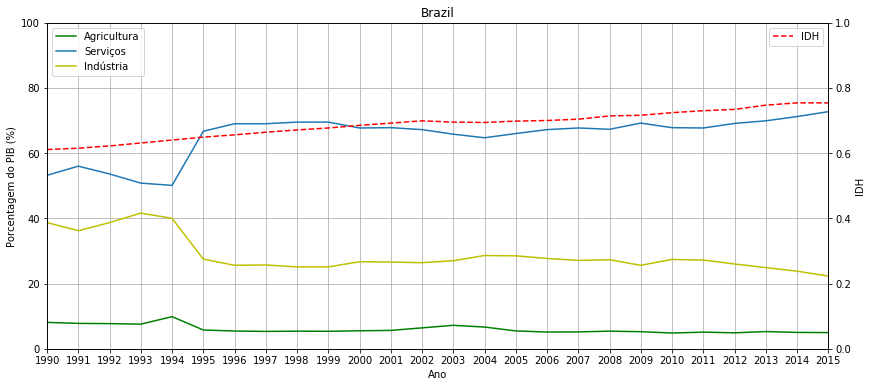

In [13]:
plotpais("Brazil")

O primeiro gráfico analisado foi o do Brasil, e alguns pontos podem ser observados. A agricultura decresceu sutilmente e nos últimos anos a área de serviços apresenta uma tendência de crescimento. Percebe-se, ainda, que algo aconteceu entre 1993 e 1994 e com um pouco de pesquisa, descobriu-se que essas variações se devem ao plano real, que estabilizou a inflação do país e a sua economia, como pode-se ver pelos anos seguientes, em que houve mais estabilidade.

__Obs 1: Caso queira, você pode mudar o nome do país na célula acima para o país de sua preferência. O nome deve ser em inglês e nem todos os países estão listados.__

# Países de IDH alto

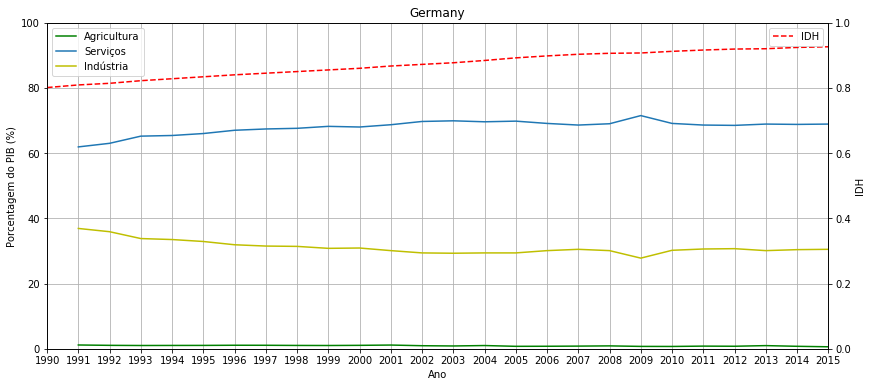

In [14]:
plotpais("Germany")

Em seguida, buscou-se analisar um país desenvolvido e com uma economia bem estabelecida, como é o caso da Alemanha. Percebe-se nesse caso porcentagens mais estáveis, agricultura virtualmente nula e, assim como no Brasil, uma tendência de crescimento na área de serviços, juntamente com um declínio na porcentagem de indústria. Além disso, há uma anomalia no ano de 2008, que revela o impacto da crise americana de 2008 na economia de outros países.

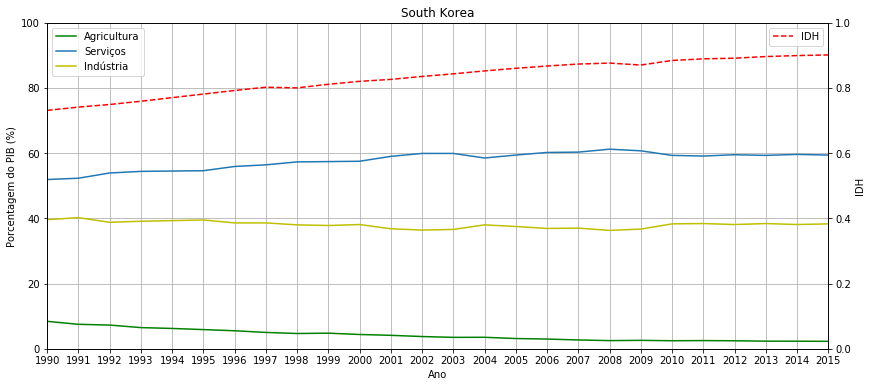

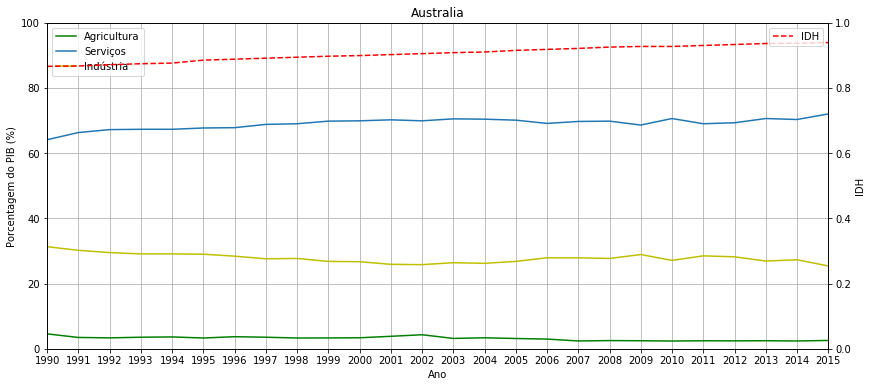

In [15]:
plotpais("South Korea")
plotpais("Australia")

Analisando mais dois países de IDH alto, é possível entender que a tendência de crescimento da porcentagem de serviços e decrescimento das áreas de indústria e agricultura é uma tendência mundial. Abaixo estão mais alguns exemplos nos quais isso ocorre.

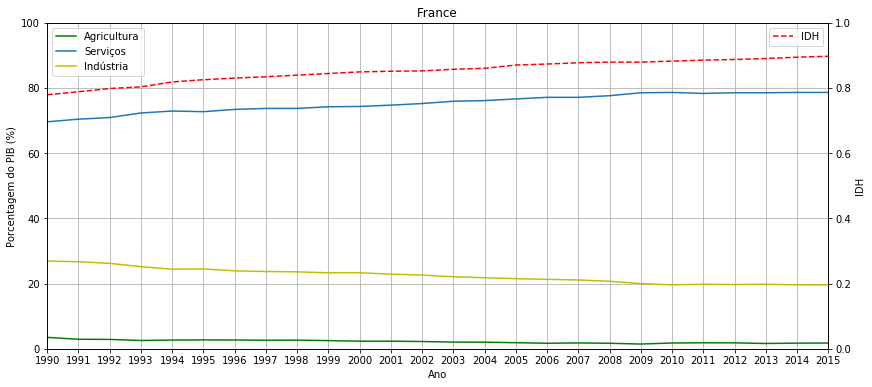

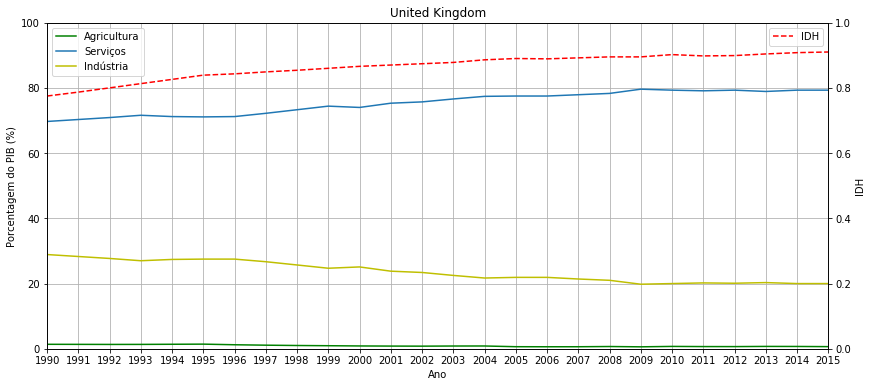

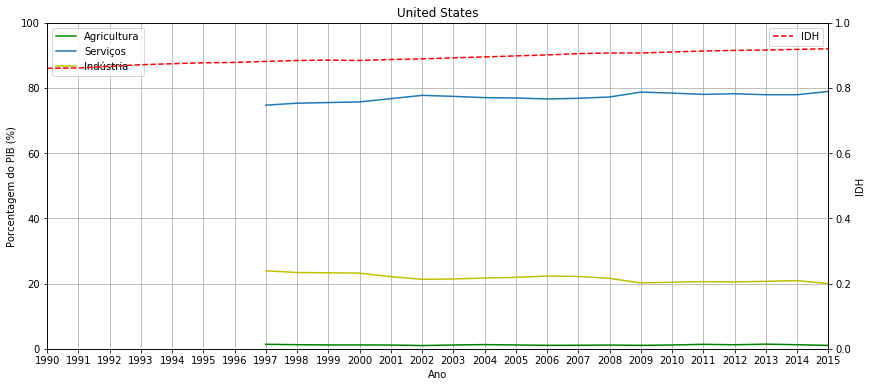

In [16]:
plotpais("France")
plotpais("United Kingdom")
plotpais("United States")

# Países de IDH baixo

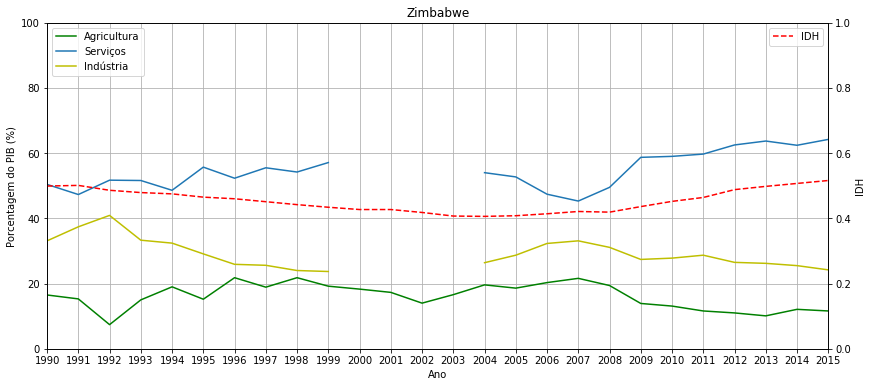

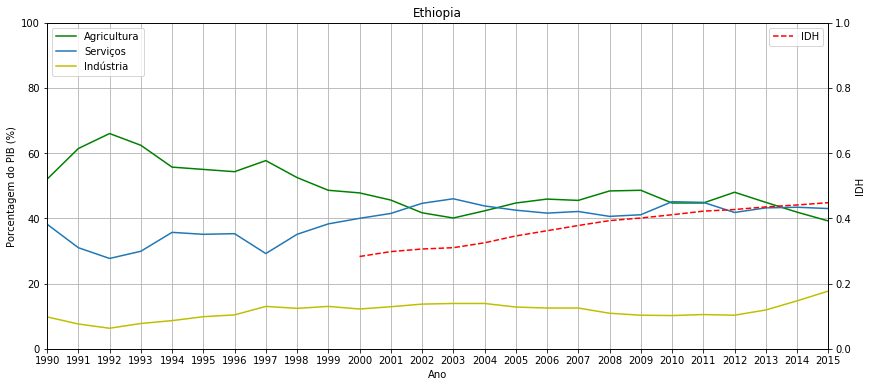

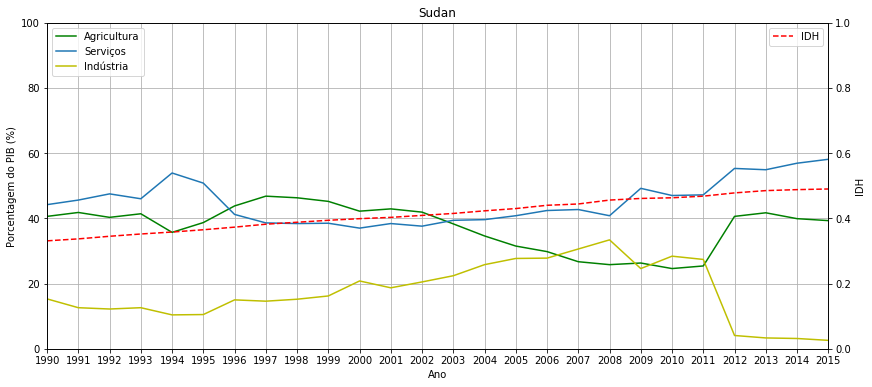

In [18]:
plotpais("Zimbabwe")
plotpais("Ethiopia")
plotpais("Sudan")

Nos países exemplificados acima, é clara a diferença entre países pobres e ricos. Nos países pobres, observar uma tendência que se aplique a maioria dos casos é mais difícil, pois diversos desses passam constantemente por conflitos regionais e internos e crises. A instabilidade das economias é clara quando comparada aos países de alto IDH, nos quais as porcentagens se aproximam de retas. Essa diferença fica clara no exemplo abaixo no qual se compara a França com o Zimbabwe.

__Obs 2: Caso queira comparar dois países basta mudar os nomes da célula abaixo.__

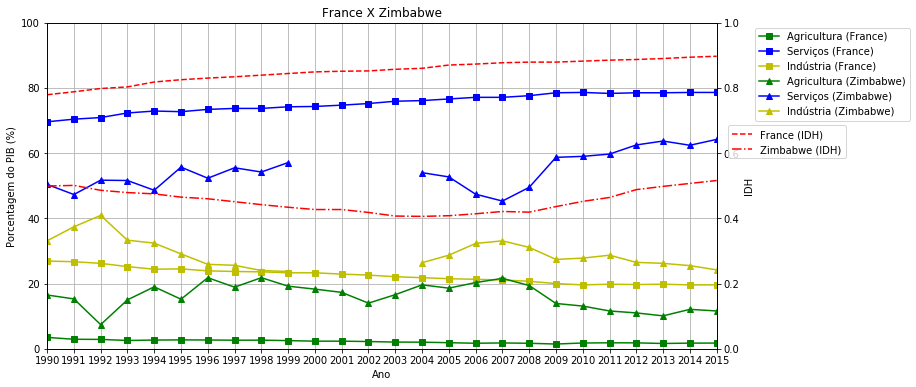

In [19]:
plotcompa("France","Zimbabwe")

# Conclusão
Assim sendo, algumas conclusões interessantes podem ser alcançadas com base nos dados analisados. Primeiramente, pode-se dizer que exceções em estudos como esse são frequentes, visto que diversos fatores estão envolvidos no desenvolvimento de um país. Entretanto, mesmo com todas as diferenças, alguns padrões relevantes foram descobertos. Um deles é o fato de que quanto maior o desenvolvimento de um país, menor a relevância da agricultura no PIB, tendendo a zero em países de IDH muito alto. Ademais, países menos desenvolvidos variam consideravelmente as porcentagens das componentes do PIB, quando comparados aos países desenvolvidos, nos quais as porcentagens se aproximam de retas. Por fim, a tendência mais relevante analisada foi a dos países do topo do ranking de IDH. Nesses casos, tornou-se evidente a diminuição da porcentagem de agricultura e indústria, acompanhada por um aumento na área de serviços. Esse incremento na área de serviços é um reflexo da era da internet, que gera novas possibilidades de desenvolvimento por meio de inovações tecnológicas, como aplicativos, as quais estão substituindo as indústrias como principal fonte de desenvolvimento.

__Futuras interações__
É surível, como futuras interações, que se analise com mais profundidade cada exceção, com o objetivo de entender melhor quais outros fatores influenciam no comportamento observado. Ademais, pode-se realizar mais comparações entre países por meio da função "plotcompa()" a fim de encontrar novos padrões e tendências.